In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_excel('data.xlsx')

In [ ]:
df.head()

,Time (min),Scanspeed (mm/s),Fluence (J/cm2),DLS (nm),UV VIS
0,7,3240,1.875040,151.960143,0.722291
1,25,3152,1.882903,114.440890,1.891808
2,9,3137,1.902242,170.006049,0.722291
3,8,3400,1.894592,142.525020,0.702770
4,5,3371,1.907519,170.006049,0.702770


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1330 entries, 0 to 1329
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Time (min)        1330 non-null   int64  
 1   Scanspeed (mm/s)  1330 non-null   int64  
 2   Fluence (J/cm2)   1330 non-null   float64
 3   DLS (nm)          1330 non-null   float64
 4   UV VIS            1330 non-null   float64
dtypes: float64(3), int64(2)
memory usage: 52.1 KB


In [ ]:
df.describe()

,Time (min),Scanspeed (mm/s),Fluence (J/cm2),DLS (nm),UV VIS
count,1330.000000,1330.000000,1330.000000,1330.000000,1330.000000
mean,13.415038,3257.492481,1.869019,133.308118,0.739947
std,7.200812,145.360144,0.023969,25.906786,0.284710
min,2.000000,3000.000000,1.830000,52.700000,0.219000
25%,7.000000,3131.250000,1.848227,114.440890,0.702770
50%,14.000000,3254.000000,1.869151,136.331734,0.702770
75%,20.000000,3379.750000,1.889668,151.960143,0.722291
max,25.000000,3500.000000,1.910000,239.800000,2.541000


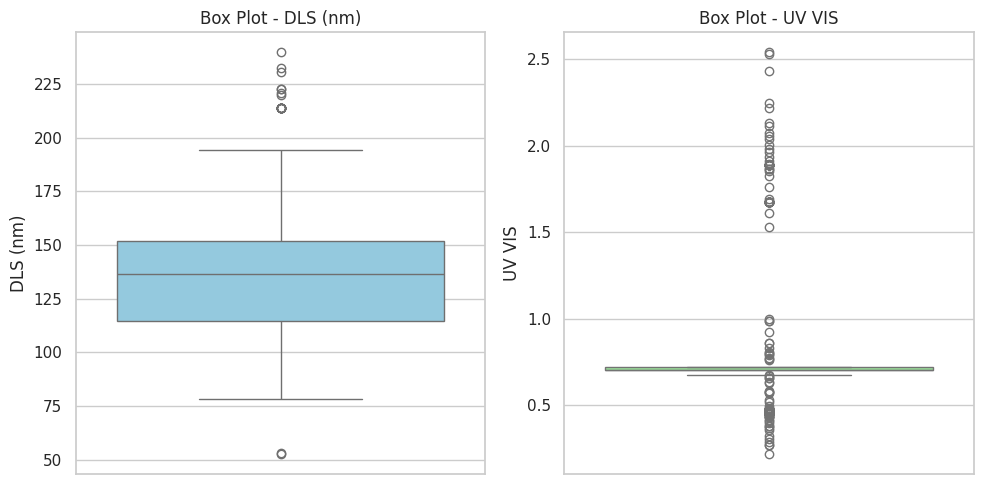

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set plot style
sns.set(style="whitegrid")

# Create subplots
plt.figure(figsize=(10, 5))

# Box plot for DLS
plt.subplot(1, 2, 1)
sns.boxplot(y=df['DLS (nm)'], color='skyblue')
plt.title('Box Plot - DLS (nm)')

# Box plot for UV VIS
plt.subplot(1, 2, 2)
sns.boxplot(y=df['UV VIS'], color='lightgreen')
plt.title('Box Plot - UV VIS')

plt.tight_layout()
plt.show()


In [ ]:
# df = df[(df['DLS (nm)'] < 190) & (df['DLS (nm)'] > 75)]
# df = df[df['UV VIS'] < 2.2]

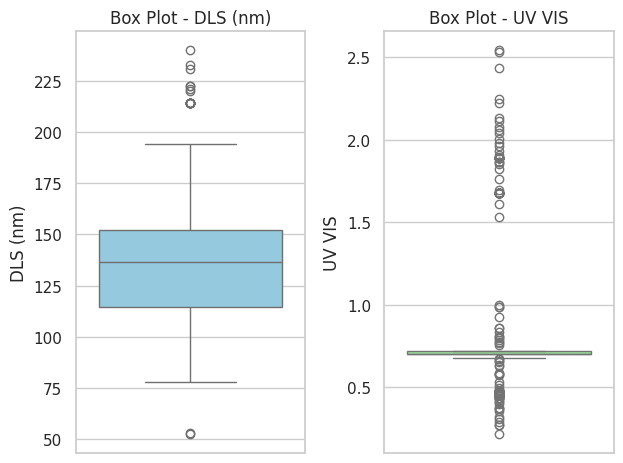

In [ ]:
# Box plot for DLS
plt.subplot(1, 2, 1)
sns.boxplot(y=df['DLS (nm)'], color='skyblue')
plt.title('Box Plot - DLS (nm)')

# Box plot for UV VIS
plt.subplot(1, 2, 2)
sns.boxplot(y=df['UV VIS'], color='lightgreen')
plt.title('Box Plot - UV VIS')

plt.tight_layout()
plt.show()

In [ ]:
# Define input and output
X = df[['DLS (nm)', 'UV VIS']]
y = df[['Time (min)', 'Scanspeed (mm/s)', 'Fluence (J/cm2)']]

In [ ]:
# 3-way split: train (60%), validation (20%), test (20%)
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)  # 0.25 * 0.8 = 0.2


In [ ]:
# ----------------------------
# Model 1: GradientBoostingRegressor
# ----------------------------
gbr = MultiOutputRegressor(GradientBoostingRegressor(random_state=42))

gbr_param_grid = {
    'estimator__n_estimators': [50, 100, 150],
    'estimator__learning_rate': [0.01, 0.1, 0.2],
    'estimator__max_depth': [2, 3, 4]
}

In [ ]:
gbr_grid = GridSearchCV(gbr, gbr_param_grid, cv=3)
gbr_grid.fit(X_train, y_train)
gbr_pred = gbr_grid.predict(X_valid)

In [ ]:
# ----------------------------
# Model 2: SVR
# ----------------------------
svr = MultiOutputRegressor(SVR())

svr_param_dist = {
    'estimator__C': [0.1, 1, 10],
    'estimator__epsilon': [0.01, 0.1, 0.5],
    'estimator__kernel': ['linear', 'rbf']
}

In [ ]:
svr_random = RandomizedSearchCV(svr, svr_param_dist, cv=3, n_iter=10, random_state=42)
svr_random.fit(X_train, y_train)
svr_pred = svr_random.predict(X_valid)

In [ ]:
# ----------------------------
# Model 3: KNN
# ----------------------------
knn = MultiOutputRegressor(KNeighborsRegressor())

knn_param_grid = {
    'estimator__n_neighbors': [3, 5, 7, 9],
    'estimator__weights': ['uniform', 'distance']
}

In [ ]:
knn_grid = GridSearchCV(knn, knn_param_grid, cv=3)
knn_grid.fit(X_train, y_train)
knn_pred = knn_grid.predict(X_valid)

In [ ]:
results = pd.DataFrame(knn_grid.cv_results_)
results.loc[:, ['param_estimator__n_neighbors', 'param_estimator__weights', 'mean_test_score', 'rank_test_score']]

,param_estimator__n_neighbors,param_estimator__weights,mean_test_score,rank_test_score
0,3,uniform,0.702184,8
1,3,distance,0.710385,7
2,5,uniform,0.715941,5
3,5,distance,0.733051,3
4,7,uniform,0.720459,4
5,7,distance,0.742292,2
6,9,uniform,0.713728,6
7,9,distance,0.745523,1


In [ ]:
# ----------------------------
# Evaluation Function
# ----------------------------
def evaluate_model(name, y_true, y_pred):
    print(f"\n{name} Validation Performance:")
    print("MAE:", mean_absolute_error(y_true, y_pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_true, y_pred)))
    print("R² Score:", r2_score(y_true, y_pred))

In [ ]:
# ----------------------------
# Results on Validation Set
# ----------------------------
evaluate_model("GradientBoostingRegressor", y_valid, gbr_pred)
evaluate_model("SVR", y_valid, svr_pred)
evaluate_model("KNN", y_valid, knn_pred)


GradientBoostingRegressor Validation Performance:
MAE: 16.437431936026726
RMSE: 47.30265446561248
R² Score: 0.7121640198885767

SVR Validation Performance:
MAE: 42.842040291624386
RMSE: 85.11790013728947
R² Score: 0.2049928155230861

KNN Validation Performance:
MAE: 15.929011879855372
RMSE: 45.2887215995038
R² Score: 0.7002531618749007


In [ ]:
# ----------------------------
# Final Evaluation on Test Set (Optional)
# ----------------------------
def final_test_evaluation(model, name):
    y_test_pred = model.predict(X_test)
    print(f"\n{name} Final Test Performance:")
    print("MAE:", mean_absolute_error(y_test, y_test_pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_test, y_test_pred)))
    print("R² Score:", r2_score(y_test, y_test_pred))

In [ ]:
# Uncomment below to test on final test set
final_test_evaluation(gbr_grid.best_estimator_, "GradientBoostingRegressor")
final_test_evaluation(svr_random.best_estimator_, "SVR")
final_test_evaluation(knn_grid.best_estimator_, "KNN")


GradientBoostingRegressor Final Test Performance:
MAE: 14.60976819127364
RMSE: 39.98797355355853
R² Score: 0.7586175774002256

SVR Final Test Performance:
MAE: 43.020724316256356
RMSE: 84.0297759081599
R² Score: 0.17682868789299291

KNN Final Test Performance:
MAE: 14.791873907316145
RMSE: 38.71021762528729
R² Score: 0.7303738381092968


In [ ]:
# ----------------------------
# Recommendation Function
# ----------------------------
def recommend_settings(model, dls, uvvis):
    input_data = np.array([[dls, uvvis]])
    prediction = model.predict(input_data)[0]
    time, scanspeed, fluence = prediction
    print(f"\nRecommended Settings for DLS={dls} nm and UV VIS={uvvis}:")
    print(f"→ Time (min): {round(time, 2)}")
    print(f"→ Scanspeed (mm/s): {round(scanspeed, 2)}")
    print(f"→ Fluence (J/cm²): {round(fluence, 4)}")

In [ ]:
# Example use
recommend_settings(gbr_grid.best_estimator_, 170.006048590365, 0.722291469573975)


Recommended Settings for DLS=170.006048590365 nm and UV VIS=0.722291469573975:
→ Time (min): 10.5
→ Scanspeed (mm/s): 3184.17
→ Fluence (J/cm²): 1.9019


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

def cosine_similarity_recommendation(dls, uv_vis, top_n=3):
    input_vector = np.array([[dls, uv_vis]])
    all_inputs = df[['DLS (nm)', 'UV VIS']].values

    similarities = cosine_similarity(input_vector, all_inputs)[0]
    top_indices = similarities.argsort()[-top_n:][::-1]  # Top N similar rows

    recommendations = df.iloc[top_indices][['Time (min)', 'Scanspeed (mm/s)', 'Fluence (J/cm2)']]
    return recommendations

# Example usage


In [ ]:
cosine_similarity_recommendation(87.54269166292646, 0.7222914695739746)


,Time (min),Scanspeed (mm/s),Fluence (J/cm2)
1029,21,3022,1.905816
983,21,3118,1.898505
874,17,3062,1.895155
